# Проект: Исследование критериев успешности компьютерных игр
Автор: Семен Лимонов

Цель — получить данные для планирования рекламных кампаний магазина компьютерных игр на основе поиска потенциально популярного продукта.  

Задача — выявить определяющие успешность игры критерии и закономерности.

В наборе данных из открытых источников доступны исторические данные о продажах игр, в том числе:

•	`Name` — название игры  
•	`Platform` — платформа (напр. PS4, PC, X360 и т.д)  
•	`Year_of_Release` — год выпуска  
•	`Genre` — жанр игры  
•	`NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
•	`EU_sales` — продажи в Европе (миллионы проданных копий)  
•	`JP_sales` — продажи в Японии (миллионы проданных копий)  
•	`Other_sales` — продажи в других странах (миллионы проданных копий)  
•	`Critic_Score` — оценка критиков (максимум 100)  
•	`User_Score` — оценка пользователей (максимум 10)  
•	`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Планируемые этапы исследования:

1. Открытие файла с данными, изучение общей информации, предобработка данных (поиск, изучение, исправление (при возможности) типов данных, пропущенных данных, дубликатов, в том числе неявных и ошибочных значений).


2. Добавление новых столбцов с дополнительно расчитанными показателями.


3. Исследовательский анализ данных:  
- динамика общего количества релизов за весь период набора данных  
- динамика выпуска в разрезе платформ  
- определение актуального периода для прогнозирования  
- анализ распределения глобальных продаж в разрезе платформ  
- анализ влияния отзывов пользователей и критиков на продажи
- анализ объемов продаж в зависимости от жанра игры   
- анализ продаж в разрезе регионов (определение популярных жанров, платформ, структуры рынка по возрастным категроям)
- проверка гипотез о равенстве средних рейтингов платформ и жанров

4. Общий вывод.

## Предобработка данных.

### Открытие файла с данными и изучение общей информации, импорт библиотек.

In [1]:
# Импортируем необходимые бибилиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (EngFormatter)
import seaborn as sns
from scipy import stats as st

from IPython.display import display
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
# Прочитаем файл с данными и создадим dataframe для дальнейшего изучения, учитывая разделитель данных в файле 
# и разделитель целой и дробной части чисел  

df = pd.read_csv('/datasets/games.csv', sep=',', decimal='.')

In [3]:
# выведем на экран общую информацию
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

**Вывод:** Набор данных содержит 16715 строк и 11 столбцов разных типов, в некоторых присутствуют пропущенные данные. Наименование столбцов приведем к общему виду в нижнем регистре.

In [4]:
# Приведем названия столбцов к нижнему регистру и выведем на экран для проверки
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Вывод:** Наименования столбцов приведены к нижнему регистру.

In [5]:
# проверим полные дубликаты
df.duplicated().sum()

0

**Вывод:** Полные дубликаты отсутствуют.

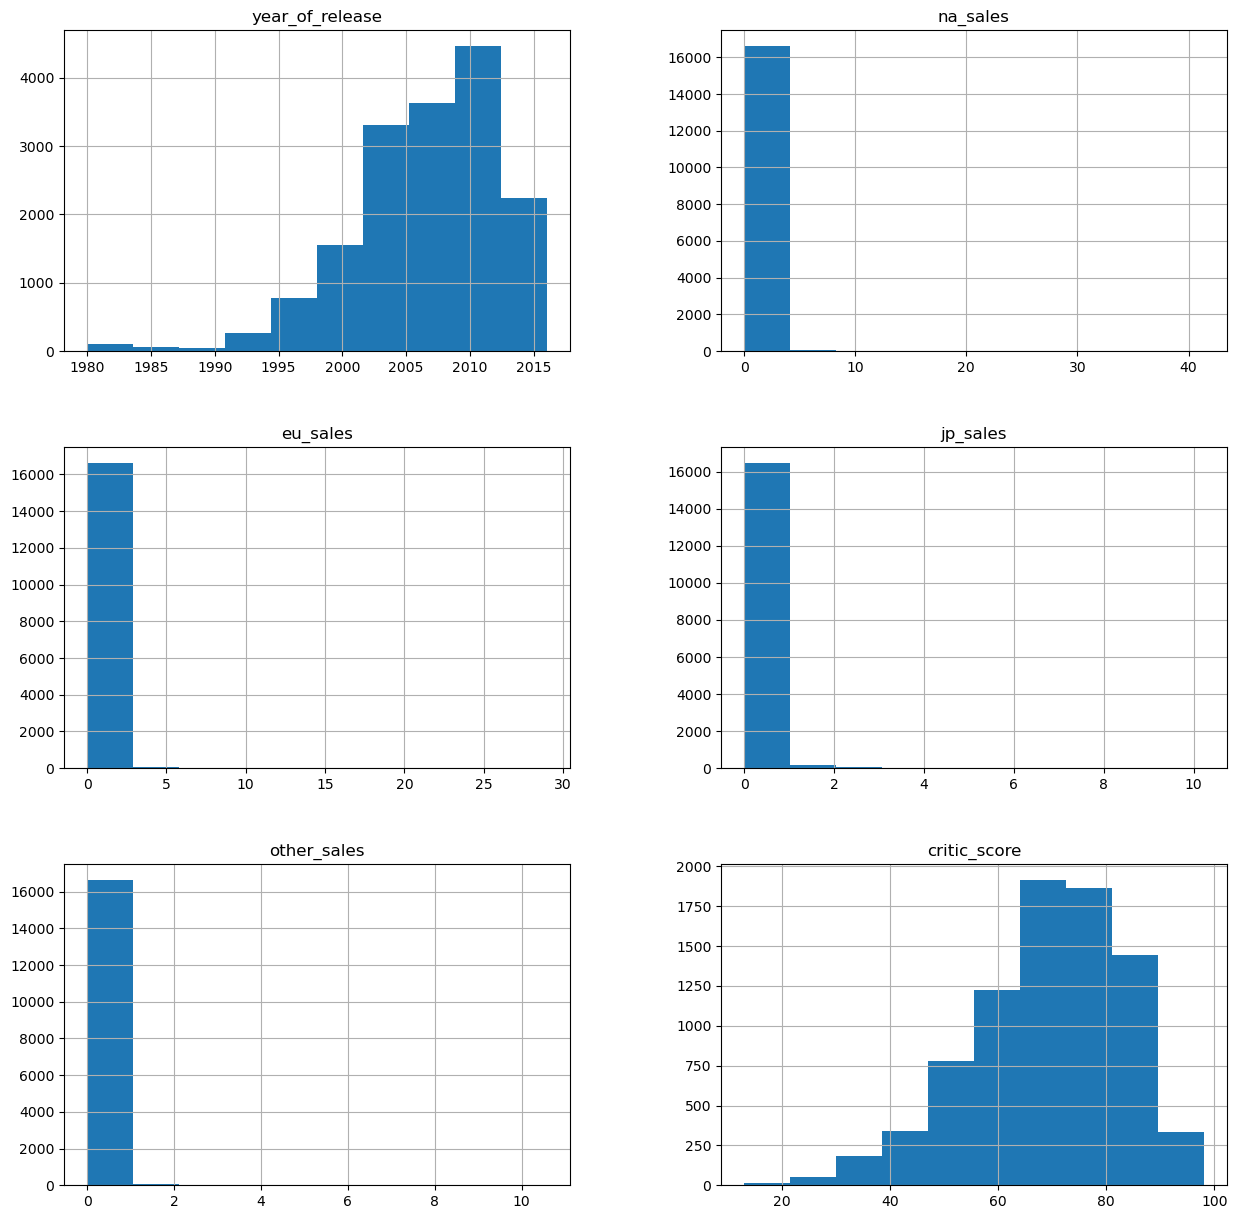

In [6]:
# Построим гистограммы по числовым столбцам
df.hist(figsize=(15, 15))
plt.show()

**Вывод:** В наборе содержатся данные за период 1980 - 2016 годы, распределение в целом соответствует развитию индустрии компьютерных игр (активный рост количества с первой половины 90-х годов). В столбцах с данными о продажах присутствует большое количество нулевых данных или близких к нулю, что потребует дополнительного анализа и обработки. Распределение рейтинга критиков выглядит нормальным, со смещением в сторону значений ниже 50. 

### Изучение типов данных и пропусков.

In [7]:
# Выведем общую информацию и первые 5 строк набора данных
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Вывод:** Столбец `year_of_release` содержит действительные числа, хотя по смыслу должен содержать целые. Столбец `user_score` имеет текстовый тип, хотя содержит дробные числа. Изменим типы данных в указанных столбцах после обработки пропусков.

In [8]:
# выведем количество и долю пропущенных данных по столбцам
isna_table = pd.DataFrame(columns=['Всего', '% пропусков']) 
isna_table['Всего'] = df.isna().sum()
isna_table['% пропусков'] = df.isna().mean() * 100
display(isna_table)

,Всего,% пропусков
name,2,0.01
platform,0,0.00
year_of_release,269,1.61
genre,2,0.01
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00
other_sales,0,0.00
critic_score,8578,51.32
user_score,6701,40.09


**Вывод:** Незначительная доля пропусков присутствует в `name`, `genre` и `year_of_release`. В столбцах рейтингов (`critic_score`, `user_score`, `rating`) доля пропусков достаточно велика - 40-50%. Изучим данные в этих столбцах подробнее.

In [9]:
# выведем пропуски в столбце name
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Вывод:** пропуски в столбцах `name` и `genre` содержатся в одинаковых строках. Данные строки с неизвестными названиями и неактуальным на данный момент годом удалим как возможно ошибочные и несущественные.

In [10]:
# удалим 2 строки с пропусками в name и genre и проверим
df = df.dropna(subset=['name', 'platform'])
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


В столбце `year_of_release` содержится 1,6 % пропусков, возникших вероятно из-за технических ошибок при выгрузке данных. Год выпуска важен для анализа, но его заполнение по данным из других строк может привести к ошибкам и искажениям. Поэтому заполним пропуски нулем, для фильтрации данных строк при анализе. Также изменим тип даных на int.

In [11]:
# заполним пропуски нулем и изменим тип на int
df['year_of_release'] = df['year_of_release'].fillna(value=0)
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


**Вывод:** пропуски заполнены, тип даных изменен.

In [12]:
# изучим данные в столбце critic_score'
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

**Вывод:** в столбце critic_score содержатся числовые значения и пропуски (51%), означающие вероятно отсутствие рейтинга игры, выставленного критиками, на момент выгрузки данных. Заменять пропуски не целесообразно во избежание искажений, т.к. данный параметр в дальнешем будет использоваться для выявления зависимостей. Тип столбца соответствует данным.

In [13]:
# изучим данные в столбце user_score'
display(df['user_score'].value_counts())

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

**Вывод:** в столбце `user_score` содержится значение tbd (To be determined - будет определено в будущем), означающее отсутствие рейтинга игры, выставленного пользователями, на момент выгрузки данных. Заменим данное значение на пустое.  

Кроме, того в столбце содержатся пропуски (40%), означающие вероятно отсутствие рейтинга игры, выставленного игроками, на момент выгрузки данных, либо ошибки в выгрузке данных. Заменять пропуски не целесообразно во избежание искажений, т.к. данный параметр в дальнешем будет использоваться для выявления зависимостей.

In [14]:
# заменим занчение tbd на пустое
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
display(df['user_score'].unique())
df['user_score'].isna().sum()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

9123

**Вывод:** замена произведена. 

In [15]:
# изменим тип user_score на float
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [16]:
# построим сводную таблицу с долей пропусков rating по годам
df.query('year_of_release > 0').pivot_table(index='year_of_release', values='rating', 
               aggfunc=(lambda x: x.isna().mean()*100))

,rating
year_of_release,
1980,100.00
1981,100.00
1982,100.00
1983,100.00
1984,100.00
1985,92.86
1986,100.00
1987,100.00
1988,93.33


**Вывод:** Данные в столбце `rating` содержат возрастную категорию игры, определяемую негосударственной организацией ESRB для применения на территории Северной Америки. ESRB была организована в 1994 году, соответственно доля пропусков начинает снижаться с 1994 года. В то же время, определение возрастной категории не является обязательным, вероятно поэтому в современном периоде по-прежнему у большой доли игр отсутствует рейтинг, возможно, по причине нежелания разработчиков ограничивать продажи. Для сохранения данных, заменим пропуски отдельной категорией 'Unrated'.

In [17]:
# заменим пропуски в столбце rating на значение Unrated
df['rating'] = df['rating'].fillna(value='Unrated')

### Поиск неявных дубликатов.

Полные дубликаты ранее не были выявлены. Произведем поиск неявных дубликатов не по всем, а по нескольким столбцам, например `name`, `platform`, `year_of_release`.

In [18]:
df[df[['name', 'platform', 'year_of_release']].duplicated(keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.00,5.50,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.00,5.50,E


**Вывод:** Обнаружены 2 строки c игрой Madden NFL 13, отличающиеся числами продаж. Строку с продажами в Европе 0.01 удалим как возможно ошибочную и несущественную.

In [19]:
# удалим строку с индексом 16230
df = df[df.index != 16230]

In [20]:
# повторно выведем на экран неявные дубликаты в столбцах name, platform, year_of_release для проверки удаления
df[df[['name', 'platform', 'year_of_release']].duplicated(keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Вывод:** дубликат игры Madden NFL 13 удален.

Произведем поиск неявных дубликатов в столбцах `platform`, `genre` и `name`.

In [21]:
# выведем уникальные значения наименования платформ
platf_uniq = pd.Series(df['platform'].unique()).sort_values()
print('Всего уникальных платформ:',len(platf_uniq))
for _ in platf_uniq:
    print(_)

Всего уникальных платформ: 31
2600
3DO
3DS
DC
DS
GB
GBA
GC
GEN
GG
N64
NES
NG
PC
PCFX
PS
PS2
PS3
PS4
PSP
PSV
SAT
SCD
SNES
TG16
WS
Wii
WiiU
X360
XB
XOne


**Вывод:** неявные дубликаты платформ не обнаружены.

In [22]:
# выведем уникальные наименования жанров
genre_uniq = pd.Series(df['genre'].unique()).sort_values()
print('Всего уникальных жанров:',len(genre_uniq))
for _ in genre_uniq:
    print(_)

Всего уникальных жанров: 12
Action
Adventure
Fighting
Misc
Platform
Puzzle
Racing
Role-Playing
Shooter
Simulation
Sports
Strategy


**Вывод:** неявные дубликаты жанров не обнаружены.

In [23]:
# выведем уникальные наименования игр
names_uniq = pd.Series(df['name'].unique()).sort_values()
print('Всего уникальных наименований:',len(names_uniq))
for _ in names_uniq:
    print(_)

Всего уникальных наименований: 11559
 Beyblade Burst
 Fire Emblem Fates
 Frozen: Olaf's Quest
 Haikyu!! Cross Team Match!
 Tales of Xillia 2
'98 Koshien
.hack//G.U. Vol.1//Rebirth
.hack//G.U. Vol.2//Reminisce
.hack//G.U. Vol.2//Reminisce (jp sales)
.hack//G.U. Vol.3//Redemption
.hack//Infection Part 1
.hack//Link
.hack//Mutation Part 2
.hack//Outbreak Part 3
.hack//Quarantine Part 4: The Final Chapter
.hack: Sekai no Mukou ni + Versus
007 Racing
007: Quantum of Solace
007: The World is not Enough
007: Tomorrow Never Dies
1 vs. 100
1/2 Summer +
10 Minute Solution
100 All-Time Favorites
100 Classic Books
100 Classic Games
1000 Cooking Recipes from ELLE à table
1001 Touch Games
101-in-1 Explosive Megamix
101-in-1 Party Megamix Wii
101-in-1 Sports Megamix
101-in-1 Sports Party Megamix
1080°: TenEighty Snowboarding
11eyes: CrossOver
12-Sai. Honto no Kimochi
12-Sai. Koisuru Diary
12Riven: The Psi-Climinal of Integral
15 Days
1701 A.D.
18 Wheeler: American Pro Trucker
18 Wheels of Steel: Extr

**Вывод:** в некоторых названиях присутствуют отметки (...sales), означающие, вероятно, учет продаж данной игры в каком-либо регионе в отдельной строке. Такие дубликаты будут искажать данные о суммарных продажах данных игр. При этом данные о продажах в таких дублирующих строках будут учитываться при группировке и анализе рынка по регионам, жанрам, годам выпуска и другим параметрам. То есть, влияние оказывается только на суммарные продажи конкретной игры. В связи с тем, что задача анализа продаж отдельных игр в рамках данного исследования не ставится, удаление таких строк и добавление их данных к строкам, содержащим основное наименование игры, представляется нецелесообразным.

Кроме того, в первых строках содержатся наименования с пробелом в начале. Удалим пробелы в данных наименованиях для удаления возможных дубликатов.

In [24]:
# удалим пробелы в начале наименований верхних 5 игр в списке
df.loc[df['name'] == ' Beyblade Burst', 'name'] = 'Beyblade Burst'
df.loc[df['name'] == ' Fire Emblem Fates', 'name'] = 'Fire Emblem Fates'
df.loc[df['name'] == " Frozen: Olaf's Quest", 'name'] = "Frozen: Olaf's Quest"
df.loc[df['name'] == ' Haikyu!! Cross Team Match!', 'name'] = 'Haikyu!! Cross Team Match!'
df.loc[df['name'] == ' Tales of Xillia 2', 'name'] = 'Tales of Xillia 2'

names_uniq = pd.Series(df['name'].unique()).sort_values()
print('Количество уникальных наименований:',len(names_uniq))

Количество уникальных наименований: 11559


**Вывод:** неявные дубликаты из-за присутствия лишнего пробела в начале наименования не обнаружены. 

### Добавление новых столбцов.

Добавим столбец с суммарными продажами по всем регионам.

In [25]:
# Добавим столбцец sales, содержащий суммарные продажи и выведем на экран 
# df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unrated,31.38


**Вывод:** столбец добавлен корректно. 

In [26]:
# расчитаем долю продаж в строках с пропушщенным годом выпуска
df[df['year_of_release'] == 0]['sales'].sum() / df['sales'].sum()

0.011098046959144106

**Вывод:** Сумма продаж игр с пропущенным годом выпуска составляет несущественную долю около 1 %. Фильтрация данных строк существенно не исказит результаты расчетов.

## Исследовательский анализ данных.

### Анализ выпуска игр по годам.

Проанализируем динамику общего количества релизов за весь период набора данных.

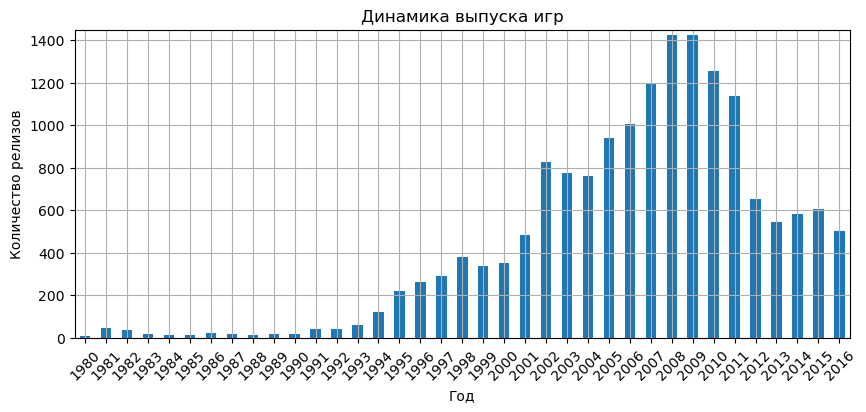

In [27]:
# Построим диаграмму динамики выпуска игр за весь период
year_pivot = df.query('year_of_release > 0').pivot_table(index='year_of_release', values='sales', aggfunc='count')
year_pivot.plot(kind='bar', 
                 title='Динамика выпуска игр',
                 y='sales', 
                 xlabel='Год',
                 ylabel='Количество релизов',
                 figsize=(10,4), 
                 grid=True, 
                 rot=45, 
                 legend=False)
plt.ylim(0,1450)
plt.show()

**Вывод:** Динамика выпуска игр отражает развитие игровой компьютерной индустрии. В период 1980 - 1990 количество выпущенных игр оставалось стабильным и незначительным (в среднем до 30 релизов в год). Активная разработка игр начинается в 1991 году, обусловленная вероятно экспоненциальным ростом производительсти и ростом доступности персональных компьютеров и игровых приставок. Более чем двукратный рост разработки происходит в 2002 году, достигая уровня 800 релизов в год. Пик на уровне более 1400 релизов был достигнут в 2008-2009 годах. С 2010 по 2012 год произошло значительное снижение количества релизов до уровня 500-600 ежегодно, который сохранялся с 2012 по 2016 год. Данные за 2016 год могут быть неполными.  

Снижение и стагнация рынка в 2010-2016 годах, возможно связаны с замедлением прироста производительности в каждом новом поколении процессоров и видеокарт, а также насыщением, в том числе технологическим, рынка разработки игрового ПО. Качество графики и игрового опыта уже не растет такими темпами как до 2010 года. Производители стараются найти новые прорывные технологии, например VR, но не всегда успешно. 

Для целей прогнозирования целесообразно ограничить данные современным периодом с 2012 по 2016 год.

### Динамика выпуска в разрезе платформ.

Посмотрим динамику продаж по платформам. Выберем топ-5 платформ по продажам для более подробного анализа. Для оценки жизненного цикла игровых платформ используем весь временной период.

In [28]:
# построим сводную таблицу суммарных продаж в разрезе платформ 
platform_pivot = df.pivot_table(index=['platform'], values='sales', 
                                aggfunc='sum').sort_values(by='sales', ascending=False).reset_index()
platform_pivot.head()

,platform,sales
0,PS2,"1,255.77"
1,X360,971.42
2,PS3,939.64
3,Wii,907.51
4,DS,806.12


**Вывод:** Первые 5 мест по продажам за весь период занимают игровые приставки. Для более репрезентативного анализа типов платформ заменим 5 место персональными компьютерами.

In [29]:
# создадим список платформ для построения графиков
platforms_to_draw = platform_pivot['platform'].head()

# заменим значение на 5 месте на PC
platforms_to_draw[len(platforms_to_draw)-1] = 'PC'

In [30]:
# создадим функцию для построения графиков динамики продаж по 5 платформам
def draw_barplot_platform_sales(name):
    
    pivot = df.query('platform == @name and year_of_release > 0').pivot_table(index='year_of_release', 
                                                                                           values='sales', aggfunc='sum')
    pivot.plot(kind='bar', 
                   title=f'Суммарные продажи {name}',
                   y='sales', 
                   xlabel='Год',
                   ylabel='Количество, млн.копий',
                   figsize=(10,4), 
                   grid=True, 
                   rot=45, 
                   legend=False)
    return plt.show()


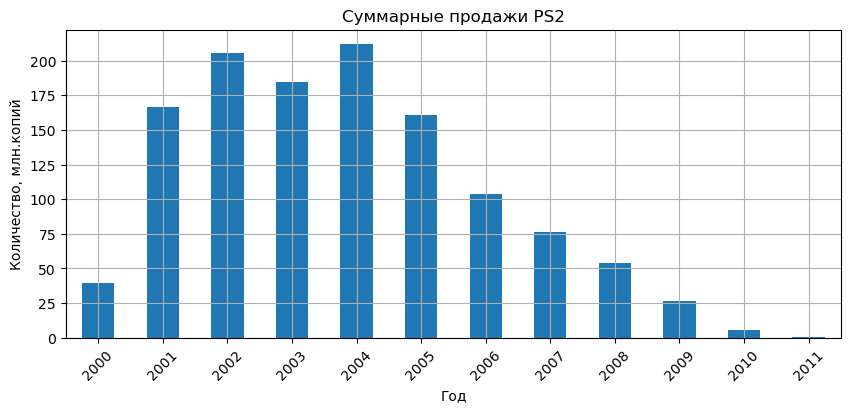

In [31]:
# вызов функции для построения графика
draw_barplot_platform_sales(platforms_to_draw[0])

**Вывод:** Жизненный цикл PS2 составил 12 лет, активные продажи - 5 лет.

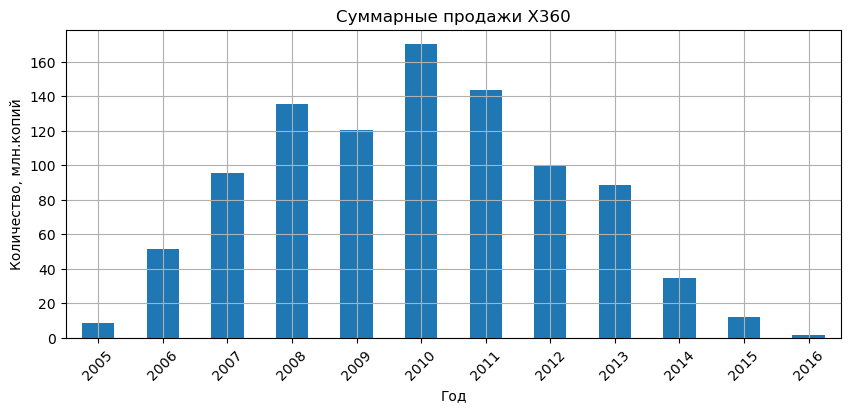

In [32]:
# вызов функции для построения графика
draw_barplot_platform_sales(platforms_to_draw[1])

**Вывод:** Жизненный цикл X360 составил 12 лет, активные продажи - 7 лет.

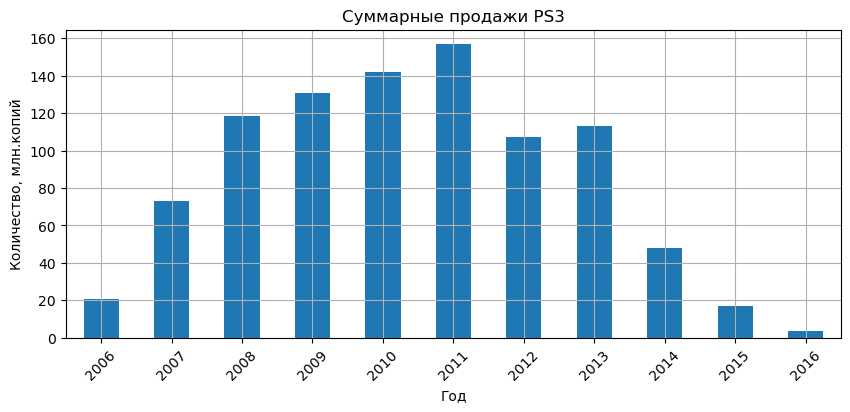

In [33]:
# вызов функции для построения графика
draw_barplot_platform_sales(platforms_to_draw[2])

**Вывод:** Жизненный цикл PS3 составил 11 лет, активные продажи - 7 лет.

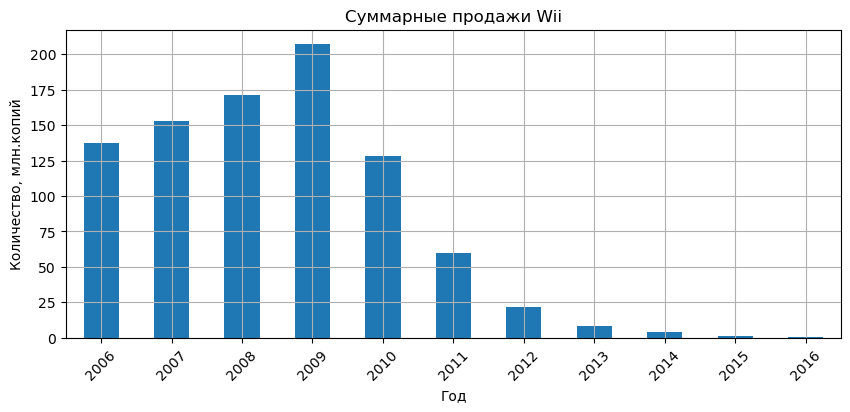

In [34]:
# вызов функции для построения графика
draw_barplot_platform_sales(platforms_to_draw[3])

**Вывод:** Жизненный цикл Wii составил 11 лет, активные продажи - 5 лет.

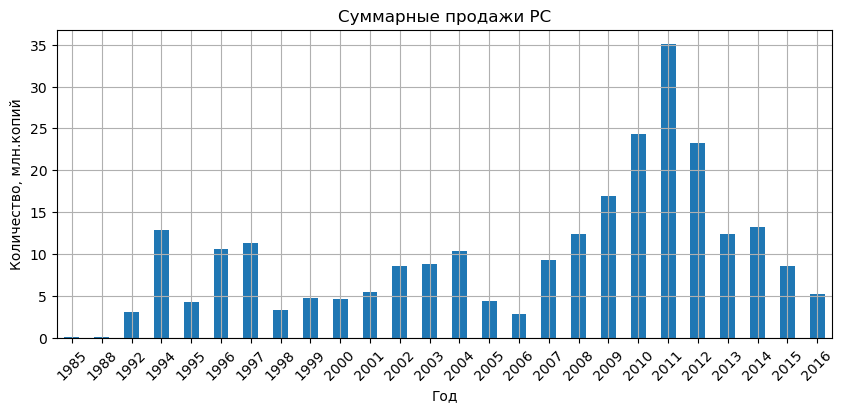

In [35]:
# вызов функции для построения графика
draw_barplot_platform_sales(platforms_to_draw[4])

**Вывод:** Диаграммы динамики продаж игр на 4 игровых платформах с наибольшим количеством продаж (игровые приставки) показывают, что срок жизни платформы составляет 11-12 лет. Первые 5-6 лет происходит рост продаж игр, достигая четко выраженного пика в конце этого периода. Во второй половине происходит закономерный спад популярности из-за технологического устаревания, появления новых поколений конкурентных платформ и ожидания пользователями нового поколения данной платформы. 

При этом игры для персональных компьютеров (PC) демонстрируют достаточно обособленную динамику. До 2009 продажи не превышали  13 млн. копий, причем в 1995 и 1998 произошло сильное снижение до 3 млн. Восстановление до прежнего уровня выше 10 млн. заняло 7 лет. Но в 2005-2006 снова происходит снижение продаж на минимальные уровни в 3 млн. С 2007 по 2011 продажи вырастают более чем в 11 раз, достигая максимального уровня в 35 млн.копий. С 2012 года начинается такое же резкое снижение и к 2016 году продажи падают до уровня 5 млн.копий. В целом, рынок игр для персональных компьютеров значительно более волатилен и менее предсказуем, по сравнению с рынком игровых приставок.

Возможно, на рынок игр для персональных компьютеров влияют не только общее состояние экономики, выход новых процессоров и видеокарт, а соответственно и новых игр с улучшенной графикой, рассчитанных на большую производительность, но и конкуренция с рынком игровых приставок и их взаимное влияние. Например, спад продаж компьютерных игр в 2005-2006 годах, вероятно был связан с одновременным выходом новых поколений приставок Sony (PS3), Microsoft (X360) и Nintendo (Wii) и, соответственно, оттоком покупателей на данные платформы. 

### Определение актуального периода для прогнозирования.

Определим актуальный период для прогнозирования на основе динамики различных платформ за современный период - 2012-2016 годы.


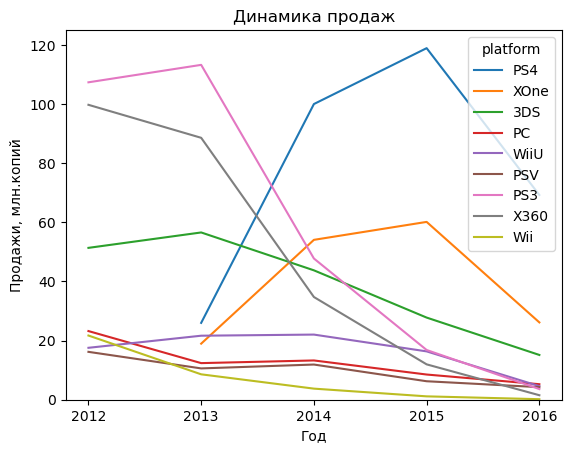

In [36]:
# ограничим данные периодом в 5 последних лет и построим сводную таблицу суммарных продаж
platform_pivot = df.query('2017 > year_of_release > 2011').pivot_table(index=['year_of_release', 'platform'],  
                                                                values='sales', aggfunc='sum').reset_index()

platf_order = platform_pivot.query('year_of_release == 2016').sort_values(by='sales', ascending=False)['platform']

# построим график динамики продаж
ax = sns.lineplot(x='year_of_release', 
                  y='sales', 
                  hue='platform', 
                  data=platform_pivot, 
                  hue_order=platf_order, 
                  markers=True 
                  )

ax.set(xlabel='Год', ylabel='Продажи, млн.копий', ylim=(0,125))
ax.set_xticks(ticks=platform_pivot['year_of_release'].unique(), minor=False)
ax.set_title('Динамика продаж')
plt.show()

**Вывод:** В 2013 году вышло новое поколение основных игровых платформ в категории игровых приставок - PS4 и XOne на смену соответственно PS3 и X360. С 2013 по 2015 год продажи PS4 и XOne активно растут, а PS3 и X360 планомерно снижаются на минимальные уровни. В 2016 лидеры продаж - PS4 (Sony), XOne (Microsoft), 3DS (Nintendo), PC и WiiU (Nintendo). Несмотря на вероятно неполные данные за 2016 год, лидеры относительно 2015 года в основном сохраняются.

Таким образом, для прогнозирования на основе актуальных данных целесообразно ограничить выборку **2015-2016 годами**, т.к. в 2014 году уходящие платформы PS3 и X360 занимают еще достаточно большую долю рынка и вносят искажения в актуальную структуру продаж.

In [37]:
# создадим отфильтрованный набор данных за период 2015-2016
df_f = df[df['year_of_release'] > 2014].copy()
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1108 non-null   object 
 1   platform         1108 non-null   object 
 2   year_of_release  1108 non-null   int32  
 3   genre            1108 non-null   object 
 4   na_sales         1108 non-null   float64
 5   eu_sales         1108 non-null   float64
 6   jp_sales         1108 non-null   float64
 7   other_sales      1108 non-null   float64
 8   critic_score     457 non-null    float64
 9   user_score       559 non-null    float64
 10  rating           1108 non-null   object 
 11  sales            1108 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 108.2+ KB


### Анализ распределения глобальных продаж в разрезе платформ.

Построим графики «ящик с усами» по глобальным продажам игр в разбивке по топ-5 актуальных платформ для анализа распределения продаж.

In [38]:
# выведем сводную таблицу топ-6 платформ по продажам
platform_pivot = df_f.pivot_table(index=['platform'],  
                                  values='sales', 
                                  aggfunc='sum').sort_values(by='sales', ascending=False).reset_index().head(6)

display(platform_pivot)

,platform,sales
0,PS4,188.15
1,XOne,86.29
2,3DS,42.92
3,WiiU,20.95
4,PS3,20.42
5,PC,13.77


**Вывод:** Уходящая платформа PS3 все еще занимает заметную долю в продажах периода за счет 2015 года, однако для исключения искажения зависимостей данную платформу учитывать не будем. Проанализируем наиболее популярные актуальные платформы: **PS4, XOne, 3DS, WiiU и PC.**

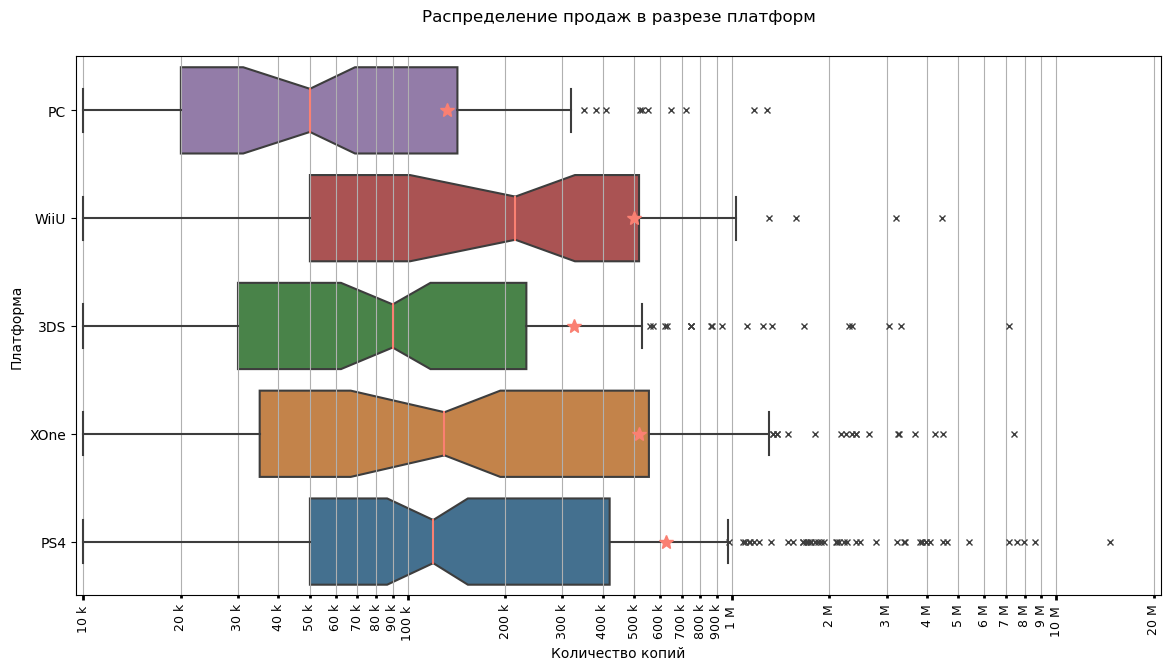

In [39]:
# построим диаграмму "ящик с усами" для выбранных платформ
fig, (ax) = plt.subplots(nrows=1, figsize=(14, 7))

ax = sns.boxplot(ax=ax, data=df_f.query('platform == "PS4" or platform == "XOne" or platform == "3DS" or platform == "WiiU" or\
                            platform == "PC"'), y='platform', x=df_f['sales']*10**6, saturation=0.5,
                flierprops={"marker": "x"}, notch=True, medianprops={"color": "#FA8072"}, showmeans=True,
                meanprops={"marker":"*", "markerfacecolor":"#FA8072", "markeredgecolor":"#FA8072", "markersize":"10"})

ax.set_xscale('log')
formatter = EngFormatter(unit='', useMathText=False, )
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_formatter(formatter)
ax.xaxis.set_tick_params(which='both', labelrotation=90, labelsize=9, width=2)
ax.set_ylim(-0.5, 4.5)
ax.set_xlim(9500, )
ax.xaxis.grid(True, which='both')

plt.title('Распределение продаж в разрезе платформ', y=1.05)
plt.ylabel('Платформа')
plt.xlabel('Количество копий')
plt.show()

**Вывод:** Игры для игровых приставок явно более продаваемые и популярные, чем для персональных компьютеров. Средние значения для приставок составили от 330 тыс.(3DS) до 630 тыс.(PS4), а для персональных компьютеров всего около 140 тыс.копий. Остальные показатели (медианы, 1 и 3 квартили) для приставок так же значительно больше, чем для компьютеров.

При этом, количество и значения выбросов в максимальную сторону для приставок также значительно больше, особенно для PS4, XOne и 3DS. Что говорит о большом количестве сверх-популярных игр с большими объемами продаж, например для PS4 наблюдаются много игр с объемом продаж от 1 до 15 млн. копий. В то же время, хитов для персональных компьютеров с продажами более 1 млн. копий всего два.

Три платформы игровых приставок можно считать лидерами. PS4 - максимальное среднее (630 тыс.) и большое количество хитов, WiiU - средние продажи немного ниже (около 500 тыс.), но максимальная среди всех медиана (большее относительное количество игр демонстрируют высокие продажи. XOne в целом на уровне PS4 и WiiU. Самая непопулярная платформа приставок - 3DS c минимальным средним и медианой среди приставок. Однако, даже аутсайдер среди приставок почти в 2 раза более популярен, чем игры для компьютеров.

### Анализ влияния отзывов пользователей и критиков на продажи.

Проанализируем влияние рейтингов критиков и пользователей на продажи в рамках разных платформ. Рассчитаем корреляции и построим диаграмму рассеяния. 

,platform,sales,critic_corr,user_corr
1,XOne,86.29,0.43,-0.04
0,PS4,188.15,0.39,-0.06
5,PC,13.77,0.38,0.15
3,WiiU,20.95,0.32,0.36
2,3DS,42.92,0.18,0.20


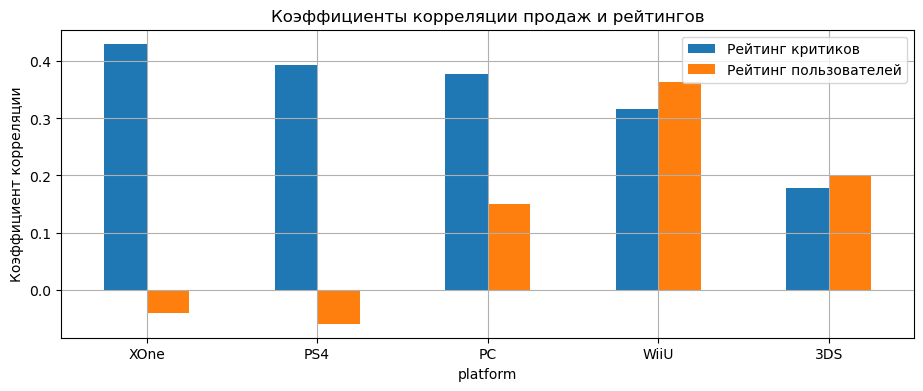

In [40]:
# создадим функцию расчета корреляций
def calculate_crit_corr(row):
    critic_corr = df_f[df_f['platform'] == row['platform']][['sales','critic_score']].corr()
    return critic_corr.loc['sales', 'critic_score']

def calculate_user_corr(row):
    user_corr = df_f[df_f['platform'] == row['platform']][['sales','user_score']].corr()
    return user_corr.loc['sales', 'user_score']

# создадим столбцы с коэффициентами корреляции продаж и рейтингов по платформам
platform_pivot['critic_corr'] = platform_pivot.apply(calculate_crit_corr, axis=1)
platform_pivot['user_corr'] = platform_pivot.apply(calculate_user_corr, axis=1)
platform_pivot = platform_pivot.sort_values(by='critic_corr', ascending=False)
display(platform_pivot.head(5))

# построим диаграмму коэффициентов корреляции
platform_pivot.head().plot(kind='bar', 
                 title='Коэффициенты корреляции продаж и рейтингов', 
                 y=['critic_corr', 'user_corr'], 
                 x='platform',
                 ylabel='Коэффициент корреляции', 
                 label=['Рейтинг критиков', 'Рейтинг пользователей'], 
                 figsize=(11,4), 
                 grid=True, 
                 rot=0, 
                 legend=True)

plt.show()

**Вывод:** Наибольшая и в целом заметная корреляция продаж наблюдается с рейтингом критиков. Коэффициент составил от 0.18 на платформе 3DS, до 0.43 на платформе XOne.

При этом зависимость продаж от пользовательского рейтинга значительно отличается на разных платформах. Положительная наблюдается для PC (0.15), 3DS (0.20) и WiiU (0.36). В то же время, для наиболее популярных платформ PS4 и XOne зависимость от пользовательских рейтингов фактически отсутствует (коэффициенты незначительно меньше 0).

Пострим графики зависимостей для платформ с наибольшей и наименьшей корреляцией.

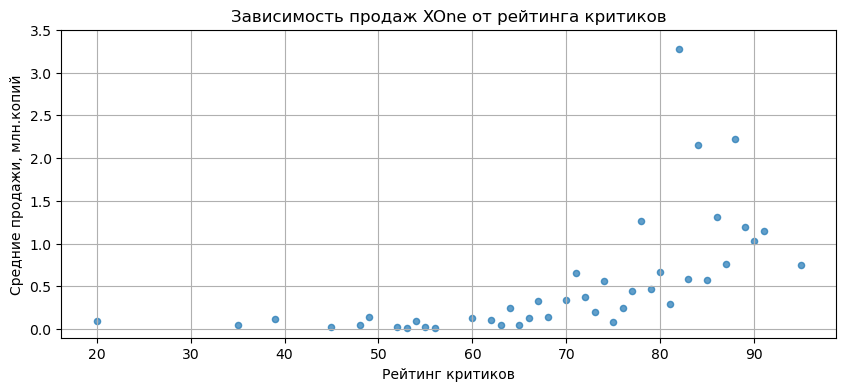

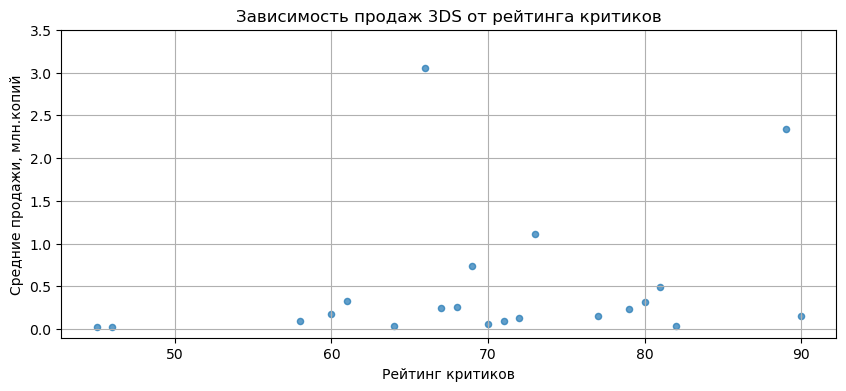

In [41]:
# Построим диаграмму зависимости продаж и рейтинга критиков для платформ с максимальной и минимальной зависимостью
platform = 'XOne'
# создадим сводную таблицу для расчета средних продаж по каждому рейтингу
critic_pivot = df_f.query('platform == @platform').pivot_table(index='critic_score', values='sales', aggfunc='mean').reset_index()

# Построим диаграмму зависимости средних продаж и рейтинга критиков 
critic_pivot.plot(kind='scatter', y='sales', x='critic_score',
                  title=f'Зависимость продаж {platform} от рейтинга критиков', 
                  ylabel='Средние продажи, млн.копий', xlabel='Рейтинг критиков',
                  legend=True, alpha=0.7, grid=True, figsize=(10,4), 
                  ylim=(-0.1,3.5))

platform = '3DS'
# создадим сводную таблицу для расчета средних продаж по каждому рейтингу
critic_pivot = df_f.query('platform == @platform').pivot_table(index='critic_score', values='sales', aggfunc='mean').reset_index()

# Построим диаграмму зависимости средних продаж и рейтинга критиков 
critic_pivot.plot(kind='scatter', y='sales', x='critic_score',
                  title=f'Зависимость продаж {platform} от рейтинга критиков', 
                  ylabel='Средние продажи, млн.копий', xlabel='Рейтинг критиков',
                  legend=True, alpha=0.7, grid=True, figsize=(10,4), 
                  ylim=(-0.1,3.5))

plt.show()

**Вывод:** Диаграммы рассеяния наглядно показывают разницу в коэффициентах корреляции. Так, на графике XOne отчетливо наблюдается рост средних продаж при росте рейтинга критиков выше 60, при этом для рейтингов выше 80 продажи увеличиваются кратно. В то же время, для 3DS зависимость не такая явная.




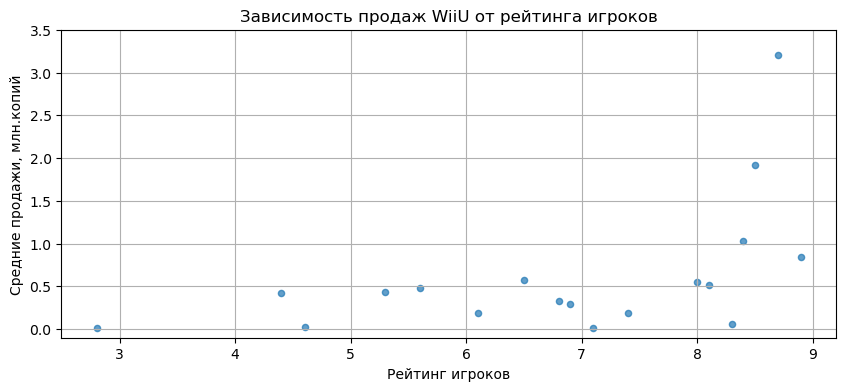

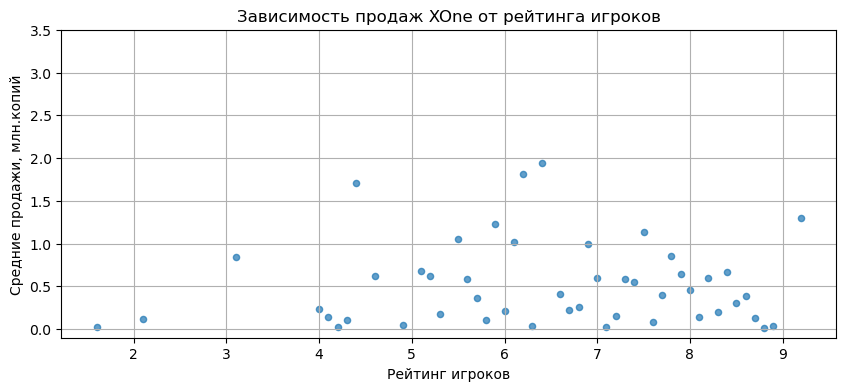

In [42]:
# Построим диаграмму зависимости продаж и рейтинга игроков для платформ с максимальной и минимальной зависимостью
platform = 'WiiU'
# создадим сводную таблицу для расчета средних продаж по каждому рейтингу
critic_pivot = df_f.query('platform == @platform').pivot_table(index='user_score', values='sales', aggfunc='mean').reset_index()

# Построим диаграмму зависимости средних продаж и рейтинга критиков 
critic_pivot.plot(kind='scatter', y='sales', x='user_score',
                  title=f'Зависимость продаж {platform} от рейтинга игроков', 
                  ylabel='Средние продажи, млн.копий', xlabel='Рейтинг игроков',
                  legend=True, alpha=0.7, grid=True, figsize=(10,4), 
                  ylim=(-0.1,3.5))

platform = 'XOne'
# создадим сводную таблицу для расчета средних продаж по каждому рейтингу
critic_pivot = df_f.query('platform == @platform').pivot_table(index='user_score', values='sales', aggfunc='mean').reset_index()

# Построим диаграмму зависимости средних продаж и рейтинга критиков 
critic_pivot.plot(kind='scatter', y='sales', x='user_score',
                  title=f'Зависимость продаж {platform} от рейтинга игроков', 
                  ylabel='Средние продажи, млн.копий', xlabel='Рейтинг игроков',
                  legend=True, alpha=0.7, grid=True, figsize=(10,4), 
                  ylim=(-0.1,3.5))
plt.show()

**Вывод:** Зависимость продаж от рейтинга игроков явно наблюдается на графике для платформы WiiU, особенно в диапазоне выше 8. При этом, для XOne (коэффициент -0.04) значения распределены хаотично, без явной зависимости от рейтинга, высокие и низкие продажи распределены по всей шкале рейтинга.

### Анализ объемов продаж в зависимости от жанра игры.



Группа жанров с долей более 20 %: 52.2
Группа жанров с долей от 5 % до 20 %: 30.2
Группа жанров с долей до 5 %: 17.6


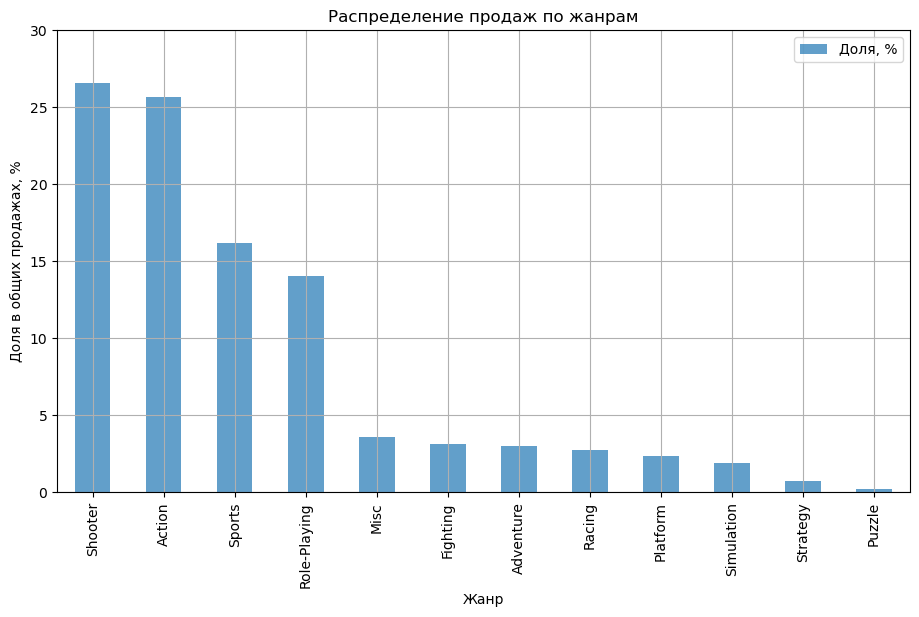

In [43]:
# создадим сводную таблицу и выведем расчетные показатели долей
genre_pivot = df_f.pivot_table(index='genre', values='sales', aggfunc='sum').reset_index().sort_values(by='sales', 
                                                                                                      ascending=False)
genre_pivot['share'] = genre_pivot['sales'] * 100 / genre_pivot['sales'].sum()
print('Группа жанров с долей более 20 %:', round(genre_pivot.query('share >= 20')['share'].sum(), 1))
print('Группа жанров с долей от 5 % до 20 %:', round(genre_pivot.query('5 <= share < 20')['share'].sum(), 1))
print('Группа жанров с долей до 5 %:', round(genre_pivot.query('share < 5')['share'].sum(), 1))

# построим диаграмму распределения продаж по жанрам
genre_pivot.plot(kind='bar', 
                 y='share', 
                 x='genre', 
                 title='Распределение продаж по жанрам', 
                 ylabel='Доля в общих продажах, %', 
                 xlabel='Жанр', label='Доля, %', alpha=0.7, 
                 grid=True, figsize=(11,6), ylim=(0,30))
plt.show()

**Вывод:** Отчетливо видны условно три группы жанров с высокими, средними и низкими продажами. Два наиболее популярных жанра с долей каждого более 20 % занимают около 52 % рынка (Action и Shooter). Группа среднепопулярных жанров с долей каждого около 15 % занимает 30 % рынка (Sports и Role-Playing). Наименее популярные жанры с долей менее 5 % каждый (Misc, Fighting, Adventure, Racing, Platform, Simulation, Strategy и Puzzle) занимают всего 17 %. 

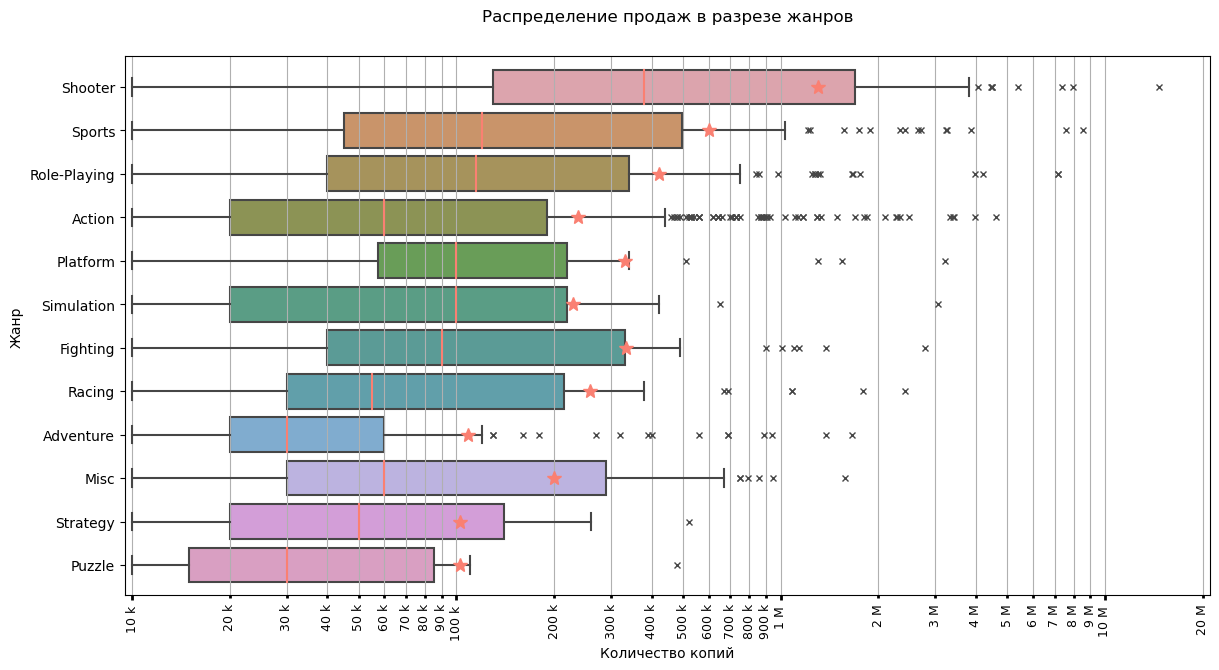

In [44]:
# построим диаграмму "ящик с усами" а разрезе жанров для оценки потенциальной прибыльности на основе характерного 
# распределения продаж
fig, (ax) = plt.subplots(nrows=1, figsize=(14, 7))

ax = sns.boxplot(ax=ax, data=df_f, y='genre', x=df_f['sales']*10**6, saturation=0.5,
                flierprops={"marker": "x"}, medianprops={"color": "#FA8072"}, showmeans=True,
                meanprops={"marker":"*", "markerfacecolor":"#FA8072", "markeredgecolor":"#FA8072", "markersize":"10"})

ax.set_xscale('log')
formatter = EngFormatter(unit='', useMathText=False, )
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_formatter(formatter)
ax.xaxis.set_tick_params(which='both', labelrotation=90, labelsize=9, width=2)
ax.set_ylim(11.7, -0.7)
ax.set_xlim(9500,)
ax.xaxis.grid(True, which='both')

plt.title('Распределение продаж в разрезе жанров', y=1.05)
plt.ylabel('Жанр')
plt.xlabel('Количество копий')
plt.show()

**Вывод:** Анализ характерного распределения продаж показывает, что доля рынка сама по себе не гарантирует прибыльности жанра для магазина. Можно заметить, что один из жанров-лидеров по доле (Action), занимающий более четверти рынка, находится лишь на 7 месте по средним и медианным продажам, несмотря на большое количество хитов с продажами от 450 тыс до 4,8 млн. копий. Остальные лидеры (Shooter, Sport, Role-Playing) сохраняют свое положение при сравнении средних продаж, однако Sport и Role-Playing сильно уступают жанру Shooter с точки зрения медианных продаж, которые хотя и выше всех остальных жанров, но незначительно.

В целом наиболее прибыльный жанр - Shooter с макисмальными средним (1,4 млн.) и медианой (380 тыс.), и значит большим относительным количеством популярных игр и большей вероятностью получить прибыльные продажи.  

Далее идут Sport и Role-Playing более чувствительные к играм-хитам (большее количество выбросов с максимальными продажами), средние значительно ниже (600 и 420 тыс. соответственно), а медианы около 125 тыс. - на уровне дргугих менее популярных жанров, поэтому требуется более тщательный выбор игр, с акцентом на игры-хиты.

Следом можно выделить группу Platform, Simulation, Fighting, Action, Racing, Misc со средними продажами 200-330 тыс. Однако Action, Racing, Misc - чувствительны к выбору хитов, их медианы 55-60 тыс., по сравнению с 90-100 тыс. у Platform, Simulation, Fighting.

Остальные жанры (Adventure, Strategy, Puzzle) сильно уступают и по средним и по медианным продажам.

### Анализ продаж в разрезе регионов.

Составим портрет пользователя каждого региона, для этого определим для каждого региона (NA, EU, JP):

•	Самые популярные платформы (топ-5).  
•	Самые популярные жанры (топ-5).  
•	Влияние рейтинга ESRB на продажи в регионах.



#### Определение топ-5 популярных платформ.


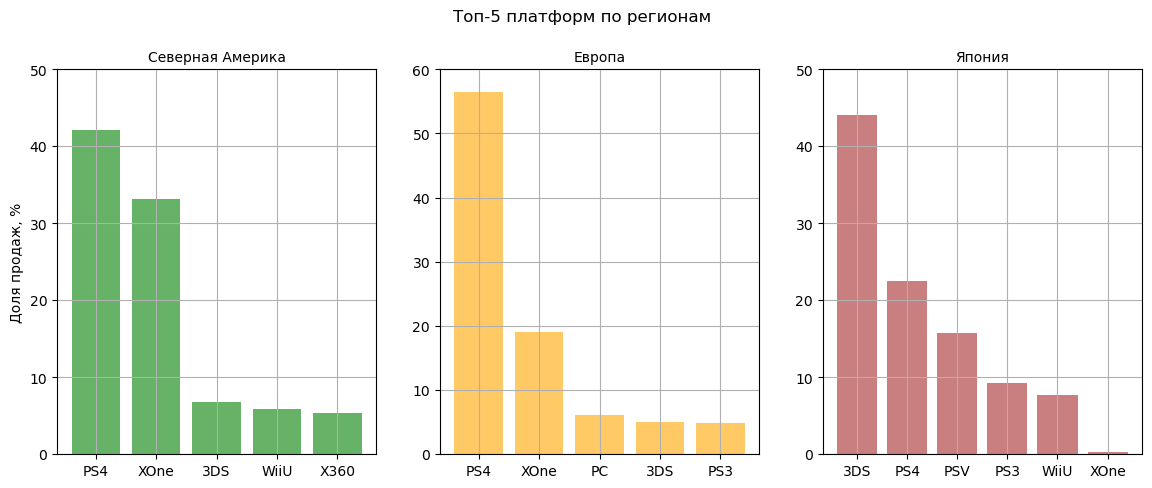

In [45]:
# рассчитаем доли продаж топ-5 платформ по регионам
na_pivot = df_f.pivot_table(index='platform', values='na_sales', aggfunc='sum'
                         ).sort_values(by='na_sales', ascending=False).reset_index()
na_pivot['share'] = na_pivot['na_sales'] * 100 / na_pivot['na_sales'].sum()
na_pivot = na_pivot.head()

eu_pivot = df_f.pivot_table(index='platform', values='eu_sales', aggfunc='sum'
                         ).sort_values(by='eu_sales', ascending=False).reset_index()
eu_pivot['share'] = eu_pivot['eu_sales'] * 100 / eu_pivot['eu_sales'].sum()
eu_pivot = eu_pivot.head()

jp_pivot = df_f.pivot_table(index='platform', values='jp_sales', aggfunc='sum'
                         ).sort_values(by='jp_sales', ascending=False).reset_index()
jp_pivot['share'] = jp_pivot['jp_sales'] * 100 / jp_pivot['jp_sales'].sum()
jp_pivot = jp_pivot.head(6)

# построим графики, отражающие доли рынка платформ по регионам
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))

ax1.bar(na_pivot['platform'], na_pivot['share'], color='green', alpha=0.6)
ax1.set_title('Северная Америка', fontsize='medium')
ax1.set_ylim(0, 50)
ax1.set_ylabel('Доля продаж, %')

ax2.bar(eu_pivot['platform'], eu_pivot['share'], color='orange', alpha=0.6)
ax2.set_title('Европа', fontsize='medium')
ax2.set_ylim(0, 60)

ax3.bar(jp_pivot['platform'], jp_pivot['share'], color='brown', alpha=0.6)
ax3.set_title('Япония', fontsize='medium')
ax3.set_ylim(0, 50)

for ax in ax1, ax2, ax3:
    ax.grid(True)
    
fig.suptitle('Топ-5 платформ по регионам', fontsize='large', y=1)
plt.show()

**Вывод:** В целом распределение платформ среди лидеров продаж на рынках Америки, Европы и Японии отражает лидерство японских производителей игровых приставок (Sony и Nintendo). Американская компания Microsoft (XOne, X360) даже на родном рынке Северной Америки смогла занять только около 38 % и даже с учетом двух поколений, актуального XOne и уходящего X360, не смогла сравняться с долей (42 %) лидирующей актуальной платформы Sony (PS4). Еще около 12 % американского рынка занимает японская компания Nintendo (3DS и WiiU). 

На рынке Европы безоговорочным лидером является Sony (PS4, PS3), занимая около 62 %. Microsoft (XOne) в Европе заметно отстает, удерживая только 19 %. Рыночное положение Nintendo (3DS) в Европе ощутимо хуже, чем на Американском рынке. Доля Nintendo составляет около 5 %. В то же время, Европейский рынок единственный из трех, где в топ-5 платформ входят персональные компьютеры с долей около 6 %, занимая третье место.

Японский рынок разительно отличается от Европы и Америки. Более половины рынка занимает Nintendo (3DS, WiiU). Sony (PS4, PSV, PS3) также занимает значительную долю, еще около 47 %. В то же время, Microsoft не смог занять даже одного процента рынка.

Таким образом, игровые платформы Microsoft достаточно популярны только в Америке и Европе, а компании Sony и Nintendo доминируют на всех трех рынках. Это может быть обусловлено тем, что Microsoft вышла на рынок игровых приставок достаточно поздно - в 2001 году, когда Sony с момента основания в 1994 году уже выпустила два поколения Playstation, а Nintendo производила игровые приставки с 1977 года. В то же время, Microsoft занимает достаточно заметную долю на рынках Америки и Европы, чтобы учитывать эту платформу для планирования продаж.

#### Определение топ-5 популярных жанров.


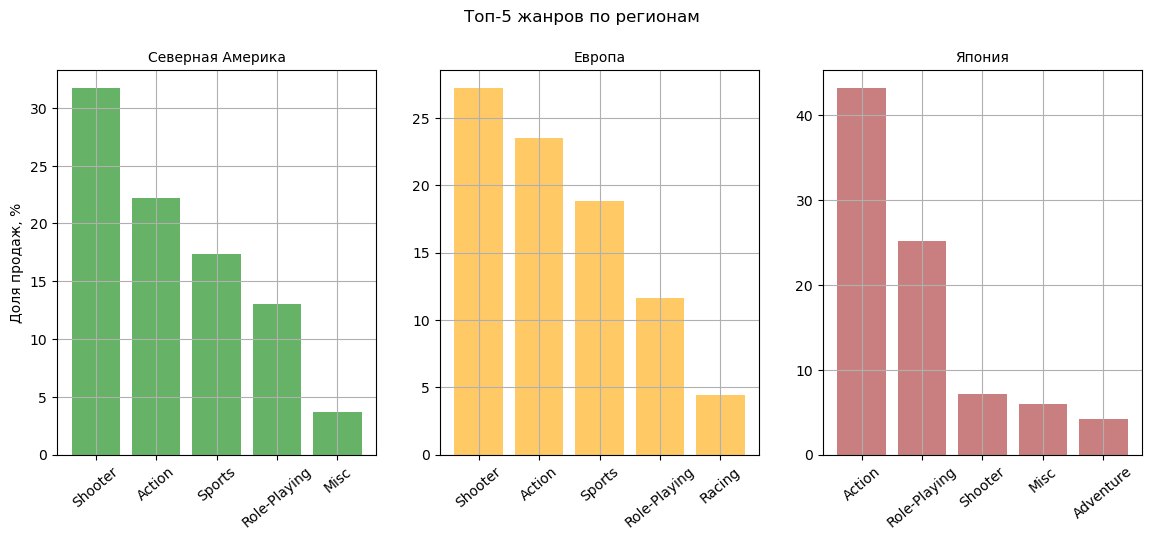

In [46]:
# рассчитаем доли продаж топ-5 жанров по регионам
na_pivot = df_f.pivot_table(index='genre', values='na_sales', aggfunc='sum'
                         ).sort_values(by='na_sales', ascending=False).reset_index()
na_pivot['share'] = na_pivot['na_sales'] * 100 / na_pivot['na_sales'].sum()
na_pivot = na_pivot.head()

eu_pivot = df_f.pivot_table(index='genre', values='eu_sales', aggfunc='sum'
                         ).sort_values(by='eu_sales', ascending=False).reset_index()
eu_pivot['share'] = eu_pivot['eu_sales'] * 100 / eu_pivot['eu_sales'].sum()
eu_pivot = eu_pivot.head()

jp_pivot = df_f.pivot_table(index='genre', values='jp_sales', aggfunc='sum'
                         ).sort_values(by='jp_sales', ascending=False).reset_index()
jp_pivot['share'] = jp_pivot['jp_sales'] * 100 / jp_pivot['jp_sales'].sum()
jp_pivot = jp_pivot.head()

# построим графики, отражающие доли жанров по регионам
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))

ax1.bar(na_pivot['genre'], na_pivot['share'], color='green', alpha=0.6)
ax1.set_title('Северная Америка', fontsize='medium')
ax1.set_ylabel('Доля продаж, %')

ax2.bar(eu_pivot['genre'], eu_pivot['share'], color='orange', alpha=0.6)
ax2.set_title('Европа', fontsize='medium')

ax3.bar(jp_pivot['genre'], jp_pivot['share'], color='brown', alpha=0.6)
ax3.set_title('Япония', fontsize='medium')

for ax in ax1, ax2, ax3:
    ax.grid(True)
    ax.tick_params(axis='x', rotation=40)

fig.suptitle('Топ-5 жанров по регионам', fontsize='large', y=1)
plt.show()

**Вывод:** Предпочтения игроков в Америке и Европе практически не отличаются, структура совпадает почти полностью, вплоть до долей рынка у определенных жанров. Первые 4 места занимают одинаковые жанры (Shooter, Action, Sports, Role-Playing), суммарно охватывая более 80 % продаж. Отличие только в жанре на 5 месте: в Америке 3 % занимает жанр Misc (аркадные и игры, не вошедшие в другие категории), а в Европе достаточно популярны гонки (Racing 4 %).

Предпочтения игроков из Японии в части жанров также сильно демонстрируют свою самобытность. Первое место с долей 42 % занимает жанр Action, в два раза более популярный чем в Европе и Америке. На втором месте жанр  Role-Playing, также в два раза более популярный с долей около 25 %. Последние 3 места с долями 4-7 % занимают Shooter, Misc, Adventure. 

Различия в предпочтениях, вероятно, обусловлены культурно-историческими и общественными особенностями разных регионов, а также различием в структуре продаж по платформам на разных рынках, так как разные платформы выпускают игры в похожих жанрах с разной степенью успешности. Поэтому игры - лидеры продаж в определенных жанрах на разных платформах могут влиять в целом на популярность определенных жанров в разных регионах.

#### Определение влияния возрастного рейтинга на продажи в регионах.


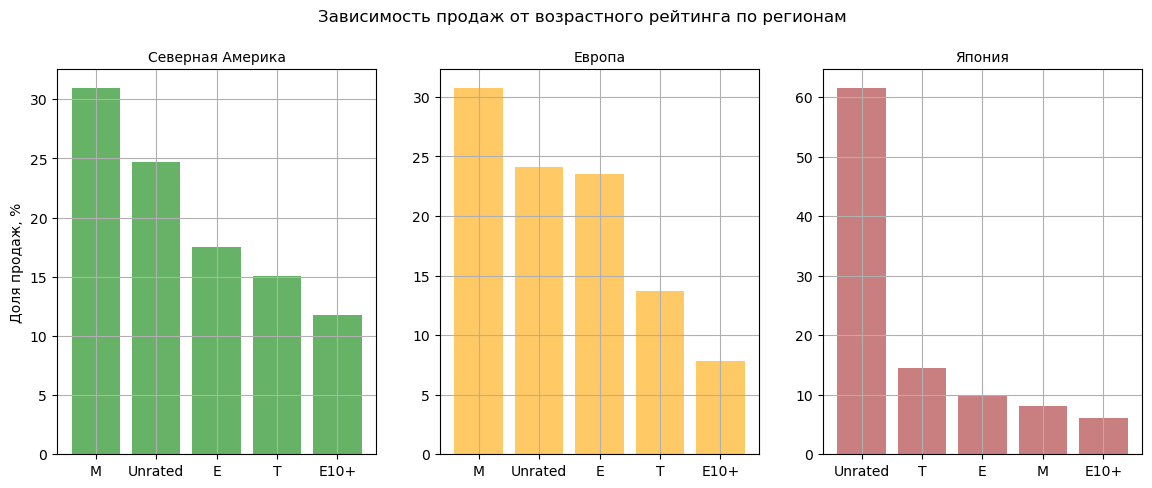

In [47]:
# рассчитаем доли продаж топ-5 рейтингов по регионам
na_pivot = df_f.pivot_table(index='rating', values='na_sales', aggfunc='sum'
                         ).sort_values(by='na_sales', ascending=False).reset_index()
na_pivot['share'] = na_pivot['na_sales'] * 100 / na_pivot['na_sales'].sum()
na_pivot = na_pivot.head()

eu_pivot = df_f.pivot_table(index='rating', values='eu_sales', aggfunc='sum'
                         ).sort_values(by='eu_sales', ascending=False).reset_index()
eu_pivot['share'] = eu_pivot['eu_sales'] * 100 / eu_pivot['eu_sales'].sum()
eu_pivot = eu_pivot.head()

jp_pivot = df_f.pivot_table(index='rating', values='jp_sales', aggfunc='sum'
                         ).sort_values(by='jp_sales', ascending=False).reset_index()
jp_pivot['share'] = jp_pivot['jp_sales'] * 100 / jp_pivot['jp_sales'].sum()
jp_pivot = jp_pivot.head()

# построим графики, отражающие доли рейтингов по регионам
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))

ax1.bar(na_pivot['rating'], na_pivot['share'], color='green', alpha=0.6)
ax1.set_title('Северная Америка', fontsize='medium')
ax1.set_ylabel('Доля продаж, %')

ax2.bar(eu_pivot['rating'], eu_pivot['share'], color='orange', alpha=0.6)
ax2.set_title('Европа', fontsize='medium')

ax3.bar(jp_pivot['rating'], jp_pivot['share'], color='brown', alpha=0.6)
ax3.set_title('Япония', fontsize='medium')

for ax in ax1, ax2, ax3:
    ax.grid(True)
    ax.tick_params(axis='x', rotation=0)
    
fig.suptitle('Зависимость продаж от возрастного рейтинга по регионам', fontsize='large', y=1)
plt.show()

**Вывод:** Структура продаж в части возрастных рейтингов, вероятно коррелирует с жанровой структурой рынков разных регионов. Так, в Америке и Европе лидирует категория М (Mature - возраст 17+), занимая более 30 % рынка, что соотносится с наиболее популярными в данных регионах жанрами Shooter и Action, которые, как правило, имеют рейтинг М (17+).  

При этом, существенную долю (почти 25 %) занимают игры без присвоения возрастной категории.

Оставшуюся часть занимают категории с меньшими ограничениями: E (Everyone - для всех возрастов), Т (Teen - возраст 13+) и E10+ (Everyone 10+ - возраст 10+). Указанные категории также в целом соответствуют следующим по популярности жанрам - Sports, Role-Playing, Racing, Misc.

Учитывая, что ESRB это рейтинги для продаж в Америке, логичным выглядит, что на японском рынке категория "Unrated" занимает более 60 %. Это может означать большее количество игр, выпускаемых исключительно для японского рынка. Остальные категории занимают от 6 до 14 %. При этом, категория М (17+) занимает только 8 % (некоторые игры жанров Action, Role-Playing, Shooter).

## Проверка гипотез.


### Проверка гипотезы о равенстве пользовательских рейтингов Xbox One и PC.

Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Сформулируем нулевую двустороннюю и альтернативную гипотезы. Нулевая гипотеза будет предполагать равенство значений, а альтернативная - неравенство.

H_0: Рейтинг пользователей (`user_score`) на платформе Xbox One = Рейтинг пользователей (`user_score`) на платформе PC   
H_1: Рейтинг пользователей (`user_score`) на платформе Xbox One ≠ Рейтинг пользователей (`user_score`) на платформе PC   

Установим порогвое значение alpha = 0.05.

Так как выборки независимы друг от друга, используем статистический `ttest_ind` для проверки гипотезы о равенстве средних двух независимых генеральных совокупностей. В связи с неравенством размеров выборок и, вероятно, дисперсий, используем значение `False` для параметра равенства дисперсий `equal_var` данного статистического метода.



In [48]:
# рассчитаем средние и дисперсию выборок 
genre_means = df_f.query('platform == "XOne" or platform == "PC"').pivot_table(index='platform', values='user_score', 
                                                                               aggfunc=('mean', 'var'))
genre_means.columns = ['Среднee', 'Дисперсия']
display(genre_means)

# вызов метода для проверки гипотезы
results = st.ttest_ind(df_f[(df_f['platform'] == 'XOne') & ~(df_f['user_score'].isna())]['user_score'], 
                       df_f[(df_f['platform'] == 'PC') & ~(df_f['user_score'].isna())]['user_score'], equal_var=False)

alpha = .05

# вывод значения p-value на экран 
print(f'p-value: {results.pvalue:,.11f}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

,Среднee,Дисперсия
platform,,
PC,6.30,3.11
XOne,6.54,2.13


p-value: 0.29463088640
Не получилось отвергнуть нулевую гипотезу


**Вывод:** При проведении статистического теста p-value составило 0,29, что значительно больше установленного порогового уровня (0,05) и не позволяет отвергнуть нулевую гипотезу о равенстве средних рейтингов в пользу альтернативной. То есть, вероятность случайно получить такое или большее различие между средними равно почти 30%, это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними.

### Проверка гипотезы о неравенстве пользовательских рейтингов жанров Action и Sports.

Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные. Сформулируем нулевую двустороннюю и альтернативную гипотезы. Нулевая гипотеза будет предполагать равенство значений, а альтернативная - неравенство.

H_0: Рейтинг пользователей (`user_score`) жанра Action = Рейтинг пользователей (`user_score`) жанра Sports  
H_1: Рейтинг пользователей (`user_score`) жанра Action ≠ Рейтинг пользователей (`user_score`) жанра Sports  

Установим порогвое значение alpha = 0.05.  

Так как выборки независимы друг от друга, используем статистический метод `ttest_ind` для проверки гипотезы о равенстве средних двух независимых генеральных совокупностей. В связи с неравенством размеров выборок и, вероятно, дисперсий, используем значение `False` для параметра равенства дисперсий `equal_var` данного статистического метода.


In [49]:
# рассчитаем средние и дисперсию выборок 
genre_means = df_f.query('genre == "Action" or genre == "Sports"').pivot_table(index='genre', values='user_score', 
                                                                               aggfunc=('mean', 'var'))
genre_means.columns = ['Среднee', 'Дисперсия']
display(genre_means)

# вызов метода для проверки гипотезы
results = st.ttest_ind(df_f[(df_f['genre'] == 'Action') & ~(df_f['user_score'].isna())]['user_score'], 
                       df_f[(df_f['genre'] == 'Sports') & ~(df_f['user_score'].isna())]['user_score'], equal_var=False)

alpha = .05

# вывод значения p-value на экран 
print(f'p-value: {results.pvalue:,.11f}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

,Среднee,Дисперсия
genre,,
Action,6.81,1.81
Sports,5.20,3.87


p-value: 0.00000000060
Отвергаем нулевую гипотезу


**Вывод:** При проведении статистического теста p-value составило 0,0000000006, что значительно меньше установленного порогового уровня (0,05) и позволяет отвергнуть нулевую гипотезу о равенстве средних рейтингов в пользу альтернативной. То есть, вероятность случайно получить такое или большее различие между средними практически равна 0, другими словами, такое различие между средними получено не случайно, и позволяет сделать вывод о значимом различии между средними пользовательских рейтингов жанров Action и Sports.

## Общий вывод.

В рамках данного проекта были исследованы особенности рынка продажи игр для разных платформ (различных игровых приставок и персональных компьютеров) на основании выборки из базы данных продаж игр за период 1980-2016 годы, с целью определить критерии потенциальной успешности игр для разных регионов (Северная Америка, Европа, Япония).

При подготовке данных к анализу было изучено наличие пропусков данных, заполнены пропуски в некоторых показателях. Также проведены поиск и удаление неявных дубликатов, а также фильтрация набора данных для получения актуального периода для дальнейшего прогнозирования. 

Набор данных был дополнен вспомогательным расчетным показателем (суммарные глобальные продажи) для изучения совокупной динамики, структуры и закономерностей.

Проведены исследования динамики разработки и выпуска игр, в том числе в разрезе платформ, определен характерный срок жизни и активных продаж разных платформ, определен актуальный период исторических данных для прогнозирования, анализ структуры рынка по платформам, жанрам, возрастным рейтингам, в том числе для отдельных регионов, оценено влияние рейтингов критиков и игроков на продажи, а также проверены гипотезы о равенстве средних рейтингов некоторых платформ и жанров.

Исследование вышеуказанных параметров позволило сделать **следующие наблюдения**:

**1)** Динамика выпуска игр в целом отражает развитие игровой компьютерной индустрии. В период 1980 - 1990 количество выпущенных игр оставалось стабильным и незначительным (в среднем до 30 релизов в год). Активная разработка игр начинается в 1991 году, обусловленная вероятно экспоненциальным ростом производительсти и ростом доступности персональных компьютеров и игровых приставок. Пик выпуска (более 1400 релизов) был достигнут в 2008-2009 годах. С 2010 по 2016 год произошло значительное снижение и стагнация количества релизов до уровня 500-600. 

**2)** Динамика продаж игр на топ-4 игровых платформах (игровые приставки) показывает, что срок жизни платформы составляет 11-12 лет. Первые 5-6 лет происходит рост продаж игр, во второй половине происходит закономерный спад популярности из-за технологического устаревания, появления новых поколений конкурентных платформ и ожидания пользователями нового поколения данной платформы. 

Игры для персональных компьютеров (PC) демонстрируют обособленную динамику, в том числе по причине технологических особенностей (платформа не меняется, меняются поколения процессоров и видеокарт). В целом, данный рынок значительно более волатилен и менее предсказуем, по сравнению с рынком игровых приставок. Например, 2004-2006 - снижение в 3 раза до 3 млн.копий, 2006-2011 - рост в 11 раз до 35 млн. копий (исторический максимум), 2011-2016 - снижение в 7 раз до 5 млн.копий.

Возможно, на рынок игр для персональных компьютеров влияют не только общее состояние экономики, развитие технологий производства чипов, а соответственно и выпуск новых игр с улучшенной графикой, но и конкуренция с рынком игровых приставок и их взаимное влияние. Например, спад продаж компьютерных игр в 2005-2006 годах, вероятно был вызван оттоком покупателей на одновременно вышедшие новые поколения приставок Sony (PS3), Microsoft (X360) и Nintendo (Wii).   

**3)** В 2013 году вышло новое поколение основных игровых платформ в категории игровых приставок - PS4 и XOne на смену соответственно PS3 и X360. С 2013 по 2015 год продажи PS4 и XOne активно растут, а PS3 и X360 планомерно снижаются на минимальные уровни. В 2016 лидеры продаж - PS4 (Sony), XOne (Microsoft), 3DS (Nintendo) и PC. Несмотря на вероятно неполные данные за 2016 год, лидеры относительно 2015 года в основном сохраняются. В 2014 году уходящие платформы PS3 и X360 занимают еще достаточно большую долю рынка и вносят искажения в актуальную структуру продаж по регионам, жанрам и платформам, поэтому данные целесообразно ограничить периодом **2015-2016** с лидерами, представленными актуальными платформами.

**4)** Игры для игровых приставок явно более продаваемые и популярные, чем для персональных компьютеров. Средние значения для приставок составили от 330 тыс.(3DS) до 630 тыс.(PS4), а для персональных компьютеров всего около 140 тыс.копий. Остальные показатели (медианы, 1 и 3 квартили) для приставок так же значительно больше, чем для компьютеров.

При этом, количество и значения выбросов в максимальную сторону для приставок также значительно больше, особенно для PS4, XOne и 3DS. Что говорит о большом количестве сверх-популярных игр с большими объемами продаж, например для PS4 наблюдаются много игр с объемом продаж от 1 до 15 млн. копий. В то же время, хитов для персональных компьютеров с продажами более 1 млн. копий всего два.

Три платформы игровых приставок можно считать лидерами. PS4 - максимальное среднее (630 тыс.) и большое количество хитов, WiiU - средние продажи немного ниже (около 500 тыс.), но максимальная среди всех медиана (большее относительное количество игр демонстрируют высокие продажи. XOne в целом на уровне PS4 и WiiU. Самая непопулярная платформа - 3DS c минимальным средним и медианой среди приставок. Однако, даже аутсайдер среди приставок почти в 2 раза более популярен, чем игры для кмпьютеров.

**5)** Наибольшая и в целом заметная корреляция продаж наблюдается с рейтингом критиков. Коэффициент составил от 0.18 на платформе 3DS, до 0.43 на платформе XOne. При этом зависимость продаж от пользовательского рейтинга отличается на разных платформах. Положительная наблюдается для PC (0.15), 3DS (0.20) и WiiU (0.36). В то же время, для наиболее популярных платформ PS4 и XOne зависимость от пользовательских рейтингов фактически отсутствует (коэффициенты незначительно меньше 0).

**6)** С точки зрения структуры отчетливо видны условно три группы жанров с высокими, средними и низкими продажами. Два наиболее популярных жанра с долей каждого более 20 % занимают около 52 % рынка (Action и Shooter). Группа среднепопулярных жанров с долей каждого около 15 % занимает 30 % рынка (Sports и Role-Playing). Наименее популярные жанры с долей менее 5 % каждый (Misc, Fighting, Adventure, Racing, Platform, Simulation, Strategy и Puzzle) занимают всего 17 %.  

Анализ характерного распределения продаж показывает, что доля рынка сама по себе не гарантирует прибыльности жанра для магазина. Так, один из лидеров (Action) находится лишь на 7 месте по средним и медианным продажам, несмотря на большое количество хитов с продажами от 400 тыс до 4,8 млн. копий. Остальные лидеры (Shooter, Sports, Role-Playing) сохраняют свое положение при сравнении средних продаж, однако Sports и Role-Playing сильно уступают жанру Shooter с точки зрения медианных продаж, которые хотя и выше всех остальных жанров, но незначительно, что говорит о большей зависимости от игр-хитов.

В целом наиболее прибыльный жанр - **Shooter**, далее идут **Sport** и **Role-Playing** более чувствительные к играм-хитам, следом можно выделить группу Platform, Simulation, Fighting, Action, Racing, Misc. Однако Action, Racing, Misc - чувствительны к выбору хитов. Остальные жанры (Adventure, Strategy, Puzzle) сильно уступают.

**7)** В целом распределение платформ среди лидеров продаж на рынках Америки, Европы и Японии отражает лидерство японских производителей игровых приставок (**Sony и Nintendo**).  

В **Северной Америке** лидирует **Sony (PS4)** с долей (42 %), Microsoft (**XOne, X360**) даже на родном рынке смогла занять только 38 %, Nintendo (**3DS и WiiU**) занимает 12 % американского рынка. 

На рынке **Европы** безоговорочным лидером является Sony (**PS4**), занимая 57 %. Microsoft (**XOne**) удерживает только 19 %. Европа единственная из трех, где в топ-5 платформ входят персональные компьютеры (**PC**) с долей около 6 %, на четвертом и пятом Nintendo (**3DS**) и Sony (**PS3**), с долями около 5 %.

**Японский рынок** разительно отличается от Европы и Америки. Лидирует Nintendo (**3DS**) - 44 %, далее Sony (**PS4, PSV, PS3**) еще около 47 %, Nintendo (**WiiU**) - 7 %. В то же время, Microsoft (XOne) не смог занять даже 1 % рынка.

Таким образом, игровые платформы Microsoft достаточно популярны только в Америке и Европе, а компании Sony и Nintendo доминируют на всех трех рынках. Это может быть обусловлено тем, что Microsoft вышла на рынок игровых приставок достаточно поздно - в 2001 году, когда Sony с момента основания в 1994 году уже выпустила два поколения Playstation, а Nintendo производила игровые приставки с 1977 года. В то же время, Microsoft занимает достаточно заметную долю на рынках Америки и Европы, чтобы учитывать эту платформу для планирования продаж.

**8)** Предпочтения игроков в **Америке** и **Европе** практически не отличаются. Первые 4 места занимают жанры **Shooter, Action, Sports, Role-Playing**, суммарно охватывая более 80 % продаж. Отличие только в жанре на 5 месте: в Америке 3 % занимает жанр **Misc** (аркадные и игры, не вошедшие в другие категории), а в Европе достаточно популярны гонки (**Racing** 4 %).

Жанровые предпочтения в **Японии** ожидаемо самобытны. Первое место с долей 42 % занимает жанр **Action**, в два раза более популярный чем в Европе и Америке. На втором месте жанр - **Role-Playing**, также в два раза более популярный - 25 %. Последние 3 места с долями 4-7 % занимают **Shooter, Misc, Adventure**. 

**9)** Структура продаж в части возрастных рейтингов, вероятно коррелирует с жанровой структурой рынков разных регионов. В Америке и Европе лидирует категория **М** (Mature - возраст 17+) - более 30 % рынка, что соотносится с наиболее популярными жанрами Shooter и Action, которые, как правило, имеют рейтинг М (17+). Существенную долю (почти 25 %) занимают игры без присвоения возрастной категории. Оставшуюся часть занимают категории с меньшими ограничениями: **E** (Everyone - для всех возрастов), **Т** (Teen - возраст 13+) и **E10+** (Everyone 10+ - возраст 10+). Указанные категории также в целом соответствуют следующим по популярности жанрам - Sports, Role-Playing, Racing, Misc.

Учитывая, что ESRB это рейтинги для продаж в Америке, логичным выглядит, что на японском рынке игры без рейтинга занимают более 60 %. Это может означать большее количество игр, выпускаемых исключительно для японского рынка. Остальные категории занимают от 6 до 14 %. При этом, категория М (17+) занимает только 8 % (некоторые игры жанров Action, Role-Playing, Shooter).

**10)** Проведение статистического теста не позволило отвергнуть гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC, но отвергло нулевую гипотезу в пользу альтернативной - о неравенстве средних пользовательских рейтингов жанров Action и Sports.



Таким образом, при формировании продуктового ассортимента интернет-магазина на следующий год целесообразно выбирать подход, учитывающий **следующие факторы**:

- увеличивать долю игр для платформ игровых приставок в первые 5-7 лет с начала выпуска данной платформы;
- потенциально наиболее доходные актуальные платформы - PS4, Xone, WiiU, 3DS и PС;
- при выборе игр для PS4 и XOne учитывать только рейтинги критиков, для WiiU, 3DS и PС - рейтинги и критиков и игроков;
- наиболее прибыльные жанры в мире - Shooter, Sports и Role-Playing (максимальные средние и медианы);
- приоритеты для продаж в Северной Америке, платформы - PS4, XOne, жанры - Shooter, Action, Sports, Role-Playing;
- приоритеты для продаж в Европе, платформы - PS4, XOne и PC, жанры - Shooter, Action, Sports, Role-Playing;
- приоритеты для продаж в Японии, платформы - 3DS, PS4, PSV, PS3 и WiiU, жанры - Action, Role-Playing, Shooter, Misc, Adventure.